In [1]:
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, dok_matrix, lil_matrix

In [2]:
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
A

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 1],
       [0, 0, 0, 2, 0, 0]])

In [3]:
S = coo_matrix(A)
print(S)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2


In [4]:
print(S.tocsr()[:, 3])

  (0, 0)	1
  (2, 0)	2


In [5]:
B = S.todense()
B

matrix([[1, 0, 0, 1, 0, 0],
        [0, 0, 2, 0, 0, 1],
        [0, 0, 0, 2, 0, 0]])

In [6]:
import timeit

times = 100000
dok_timeit = timeit.timeit(lambda: dok_matrix(B), number=times) / times
print("dok_matrix():", dok_timeit)

lil_timeit = timeit.timeit(lambda: lil_matrix(B), number=times) / times
print("lil_matrix():", lil_timeit)

csr_timeit = timeit.timeit(lambda: csr_matrix(B), number=times) / times
print("csr_matrix():", csr_timeit)

csc_timeit = timeit.timeit(lambda: csc_matrix(B), number=times) / times
print("csc_matrix():", csc_timeit)

dok_matrix(): 7.590072996001254e-05
lil_matrix(): 9.584405008998146e-05
csr_matrix(): 7.660926609998569e-05
csc_matrix(): 7.152801559001091e-05


In [7]:
import pandas as pd
import string

def get_and_clean_data() -> pd.DataFrame:
    data = pd.read_csv("../../data/software_development_usa.csv")
    description = data["job_description"]
    cleaned_description = description.apply(
        lambda s: s.translate(str.maketrans("", "", string.punctuation + "\xa0"))
    )
    cleaned_description = cleaned_description.apply(lambda s: s.lower())
    cleaned_description = cleaned_description.apply(
        lambda s: s.translate(
            str.maketrans(string.whitespace, " " * len(string.whitespace), "")
        )
    )
    cleaned_description = cleaned_description.drop_duplicates()
    return cleaned_description

In [8]:
from ordered_set import OrderedSet
import re

cleaned_description = get_and_clean_data()[:1000]
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))
cleaned_description

/tmp/ipykernel_3738/2979533673.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cleaned_description = get_and_clean_data()[:1000]


0       the chosen sr software developer will be part ...
1       position c lead software developer location mi...
2       senior software developer hoboken nj starts as...
3       our client a multinational publishing and educ...
4       position c lead software developer location ph...
                              ...                        
1230    job summary software developer ruby on rails c...
1231    globalstar seeks a software developer to join ...
1232     software engineer services rockstar level exp...
1233    job title lead software developertechnical pm ...
1234    ref id classification software engineer compen...
Name: job_description, Length: 1000, dtype: object

In [9]:
from nltk import word_tokenize

tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))
tokenized_description

0       [the, chosen, sr, software, developer, will, b...
1       [position, c, lead, software, developer, locat...
2       [senior, software, developer, hoboken, nj, sta...
3       [our, client, a, multinational, publishing, an...
4       [position, c, lead, software, developer, locat...
                              ...                        
1230    [job, summary, software, developer, ruby, on, ...
1231    [globalstar, seeks, a, software, developer, to...
1232    [software, engineer, services, rockstar, level...
1233    [job, title, lead, software, developertechnica...
1234    [ref, id, classification, software, engineer, ...
Name: job_description, Length: 1000, dtype: object

In [10]:
import nltk
nltk.download(["stopwords"])
from nltk.corpus import stopwords

stop_dict = set(stopwords.words())
sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])
sw_removed_description

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tkthanatorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [chosen, software, developer, part, larger, en...
1       [position, lead, software, developer, location...
2       [senior, software, developer, hoboken, starts,...
3       [client, multinational, publishing, education,...
4       [position, lead, software, developer, location...
                              ...                        
1230    [job, summary, software, developer, ruby, rail...
1231    [globalstar, seeks, software, developer, join,...
1232    [software, engineer, services, rockstar, level...
1233    [job, title, lead, software, developertechnica...
1234    [ref, classification, software, engineer, comp...
Name: job_description, Length: 1000, dtype: object

In [11]:
from nltk import PorterStemmer

concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
stem_cache = {}
ps = PorterStemmer() 
for s in concated:
    stem_cache[s] = ps.stem(s)

stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
stemmed_description

0       [chosen, softwar, develop, part, larger, engin...
1       [posit, lead, softwar, develop, locat, middlet...
2       [senior, softwar, develop, hoboken, start, mon...
3       [client, multin, publish, educ, compani, seek,...
4       [posit, lead, softwar, develop, locat, philade...
                              ...                        
1230    [job, summari, softwar, develop, rubi, rail, c...
1231    [globalstar, seek, softwar, develop, join, tea...
1232    [softwar, engin, servic, rockstar, level, expe...
1233    [job, titl, lead, softwar, developertechn, net...
1234    [ref, classif, softwar, engin, compens, year, ...
Name: job_description, Length: 1000, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=lambda s: s)
vectorizer = cv.fit(stemmed_description)
x = vectorizer.transform(stemmed_description)
pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

,aa,aaa,aadairstrategicstaffcom,aaeeo,aampt,aapeeo,aau,ab,abap,abapworkflow,...,zeromq,zigbe,zip,zipkin,zone,zookeep,zoom,zumba,zuora,zuul
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
XX = x.toarray()
print(np.shape(np.matmul(x.toarray(), x.toarray().T)))
timeit.timeit(lambda: np.matmul(XX, XX.T), number=1)

(1000, 1000)


6.496188322002126

In [14]:
stat = timeit.timeit(lambda: np.matmul(XX, XX.T), number=3) / 3
print("matmul():", stat)

stat = timeit.timeit(lambda: x.todok() * x.T.todok(), number=3) / 3
print("todok():", stat)

stat = timeit.timeit(lambda: x.tolil() * x.T.tolil(), number=3) / 3
print("tolil():", stat)

stat = timeit.timeit(lambda: x.tocoo() * x.T.tocoo(), number=3) / 3
print("tocoo():", stat)

stat = timeit.timeit(lambda: x.tocsc() * x.T.tocsc(), number=3) / 3
print("tocsc():", stat)

matmul(): 6.478815782667273
todok(): 0.16677329866555132
tolil(): 0.07269233466649894
tocoo(): 0.05432471000070412
tocsc(): 0.05275651166690901


In [15]:
def get_set_list_operation_time(num: int):
    cleaned_description = get_and_clean_data()[:num]
    cleaned_description = cleaned_description.apply(
        lambda s: re.sub(r"[^A-Za-z]", " ", s)
    )
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r"\s+", " ", s))
    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))
    stop_dict = set(stopwords.words())

    def list_comp():
        return tokenized_description.apply(
            lambda s: [word for word in s if word not in stop_dict]
        )

    def set_comp():
        return tokenized_description.apply(
            lambda s: list(OrderedSet(s) - stop_dict)
        )

    list_time = timeit.timeit(list_comp, number=1000)
    set_time = timeit.timeit(set_comp, number=1000)

    return set_time, list_time

In [16]:
import matplotlib.pyplot as plt

set_times: list[float] = []
list_times: list[float] = []
samples = [500, 1000, 1500, 2000, 2500, 3000]
for sample in samples:
    set_time, list_time = get_set_list_operation_time(sample)
    set_times.append(set_time)
    list_times.append(list_time)

/tmp/ipykernel_3738/946393824.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cleaned_description = get_and_clean_data()[:num]
/tmp/ipykernel_3738/946393824.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cleaned_description = get_and_clean_data()[:num]
/tmp/ipykernel_3738/946393824.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

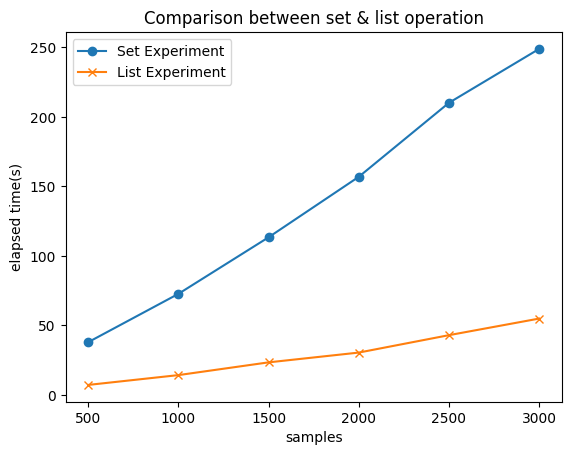

In [17]:
plt.plot(samples, set_times, label='Set Experiment', marker='o')  
plt.plot(samples, list_times, label='List Experiment', marker='x') 
plt.title("Comparison between set & list operation")
plt.xlabel("samples")
plt.ylabel("elapsed time(s)")
plt.legend()
plt.show()